# Flight Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\shubham\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the Flight Fare Data

In [2]:
Train_data=pd.read_excel("Data_Train.xlsx")
Train_data.shape

(10683, 11)

In [3]:
Test_data=pd.read_excel("Test_set.xlsx")
Test_data.shape

(2671, 10)

In [4]:
# concate the Train_data And Test _data
flight_df = pd.concat([Train_data, Test_data], ignore_index=True, sort=False)
flight_df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


### Data Inspection

#### Shape of the dataset

In [5]:
flight_df.shape

(13354, 11)

#### Summary of the dataset


In [6]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:

flight_df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [8]:
flight_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Exploratory Data Analysis (EDA)

#### top 10 most preferred Airlines

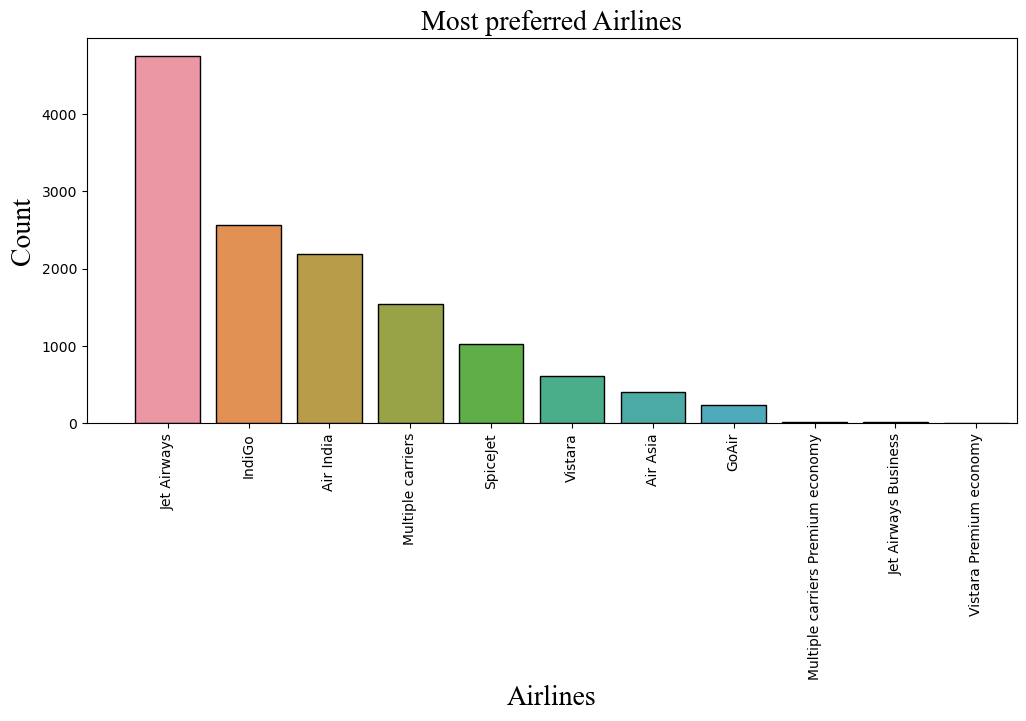

In [9]:


plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

#### Airlines Vs Flighticket Price

In [10]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


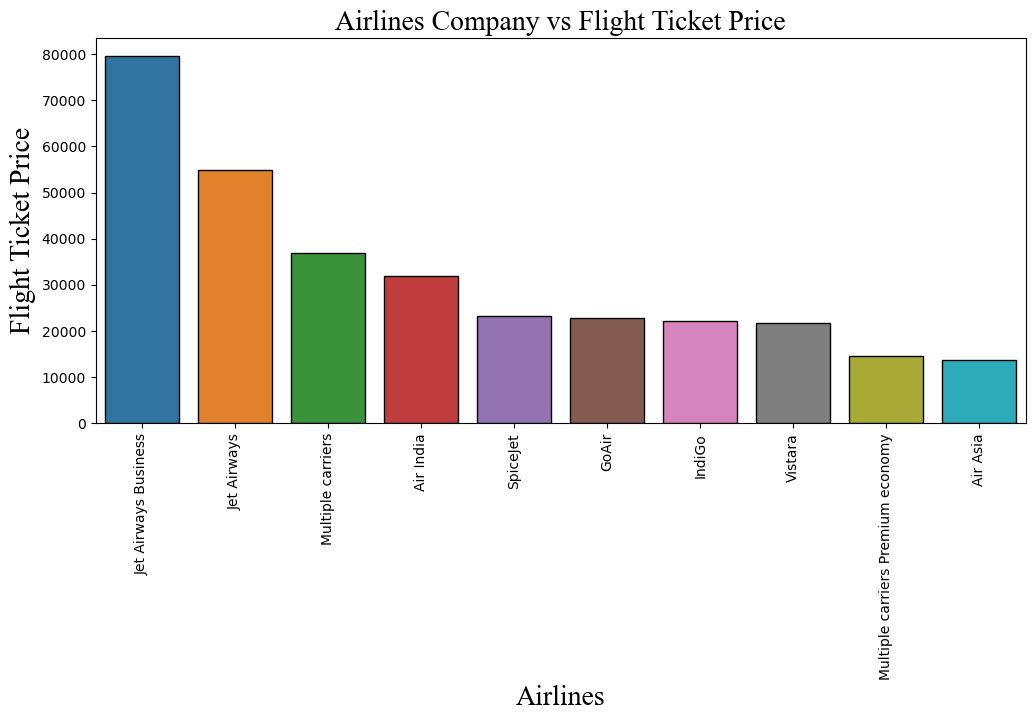

In [11]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

#### Price on Weekdays vs Weekends

In [12]:
days_df = flight_df[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897.0
1,Air India,1/05/2019,7662.0
2,Jet Airways,9/06/2019,13882.0
3,IndiGo,12/05/2019,6218.0
4,IndiGo,01/03/2019,13302.0


In [13]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897.0,Sunday,1
1,Air India,2019-05-01,7662.0,Wednesday,0
2,Jet Airways,2019-06-09,13882.0,Sunday,1
3,IndiGo,2019-05-12,6218.0,Sunday,1
4,IndiGo,2019-03-01,13302.0,Friday,0


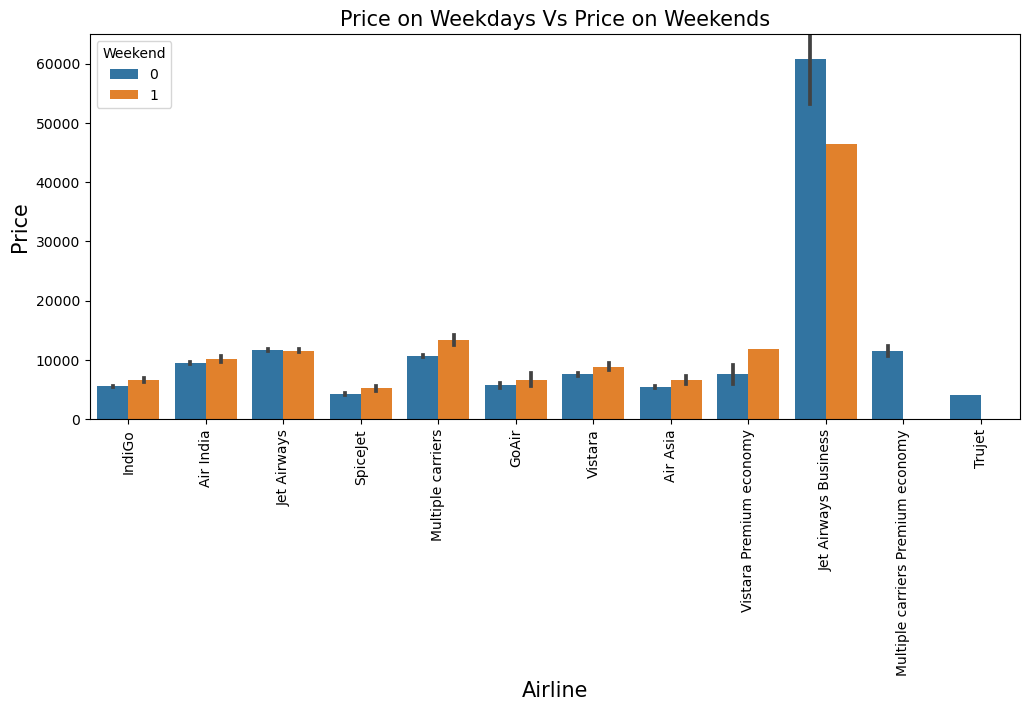

In [14]:
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

### Feature Engineering

In [15]:
# Extact day, month, year from Date_of_Journey feature and store them in new columns. 

flight_df["Journey_date"]=flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"]=flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [16]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
#drop the journey date
flight_df=flight_df.drop(["Date_of_Journey"],axis=1)

In [18]:
flight_df["Journey_year"].value_counts()

Journey_year
2019    13354
Name: count, dtype: int64

In [19]:
#drop journey year because all row have 2019
flight_df=flight_df.drop(["Journey_year"],axis=1)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [20]:
# Total_Stops 

flight_df["Total_Stops"]=flight_df["Total_Stops"].str.split(" ").str[0]
flight_df["Total_Stops"]=flight_df["Total_Stops"].replace("non-stop","0")
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3


In [21]:
# Extracting hours and min from Arrival time, Departure time

# Arrival_Time
flight_df["Arrival_Time"]=flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour']=flight_df["Arrival_Time"].str.split(':').str[0].astype(int)
flight_df['Arrival_min']=flight_df["Arrival_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Arrival_Time"],axis=1)

# Dep_Time
flight_df['Dep_hour']=flight_df["Dep_Time"].str.split(':').str[0].astype(int)
flight_df['Dep_min']=flight_df["Dep_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Dep_Time"],axis=1)

flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,21,35,16,50


In [22]:
#Route info count as total_stops and additional_info no information
flight_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [23]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50


In [24]:
flight_df["Duration_hr"]=flight_df["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [25]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4


In [26]:
flight_df["Duration_min"]=flight_df["Duration"].str.split(' ').str[1].str.split('m').str[0]

In [27]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [28]:
flight_df['Duration_min'].fillna("0",inplace=True)

In [29]:
flight_df['Duration_hr'].str.contains('h').sum()

0

In [30]:
flight_df['Duration_hr'].str.contains('m').sum()

2

In [31]:
flight_df['Duration_min'].str.contains('h').sum()

0

In [32]:
flight_df['Duration_min'].str.contains('m').sum()

0

In [33]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m,0
13343,Air India,Mumbai,Hyderabad,5m,2,NaN,12,3,16,55,16,50,5m,0


In [34]:
flight_df.loc[[6474, 2660], 'Duration_min'] = flight_df.loc[[6474, 2660], 'Duration_hr']
flight_df.loc[flight_df['Duration_min'] == '5m', 'Duration_min'] = 5

In [35]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [36]:
flight_df["Duration_hr"]=flight_df["Duration_hr"].replace("5m","0")

In [37]:
flight_df['Duration_hr'].str.contains('m').sum()

0

In [38]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [39]:
flight_df["Duration_hr"] = flight_df["Duration_hr"].astype(int)

In [40]:
flight_df["Duration_min"] = flight_df["Duration_min"].astype(int)

In [41]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [42]:
flight_df["Duration"] = (flight_df["Duration_hr"]*60) + flight_df["Duration_min"]
flight_df=flight_df.drop(['Duration_hr','Duration_min'],axis=1)
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


In [43]:
flight_df.head(6475)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,725,1,9845.0,21,3,21,0,8,55
6471,IndiGo,Banglore,Delhi,165,0,4077.0,1,5,4,15,1,30
6472,Multiple carriers,Delhi,Cochin,690,1,9315.0,21,5,19,0,7,30
6473,Jet Airways,Kolkata,Banglore,570,1,14781.0,9,5,23,35,14,5


### Checking for null values

In [44]:
flight_df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price            2671
Journey_date        0
Journey_month       0
Arrival_hour        0
Arrival_min         0
Dep_hour            0
Dep_min             0
dtype: int64

In [45]:
# null value of prce fill with mean of all
flight_df["Price"].fillna(flight_df["Price"].mean(),inplace=True)

In [46]:
# filling Total_Stops
flight_df["Total_Stops"].value_counts()

Total_Stops
1    7056
0    4340
2    1899
3      56
4       2
Name: count, dtype: int64

In [47]:
flight_df.dtypes

Airline           object
Source            object
Destination       object
Duration           int32
Total_Stops       object
Price            float64
Journey_date       int32
Journey_month      int32
Arrival_hour       int32
Arrival_min        int32
Dep_hour           int32
Dep_min            int32
dtype: object

In [48]:
# '1' is most frequently occuring value. So fill Total_Stops column null values by '1'
flight_df["Total_Stops"]=flight_df["Total_Stops"].fillna('1')

In [49]:
flight_df["Total_Stops"]=flight_df["Total_Stops"].astype(int)

In [50]:
flight_df.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

### Using Encoding to Handle categorical data
- Airline
- Source
- Destination
 

In [51]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


In [52]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_df[i]=la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897.0,24,3,1,10,22,20
1,1,3,0,445,2,7662.0,1,5,13,15,5,50
2,4,2,1,1140,2,13882.0,9,6,4,25,9,25
3,3,3,0,325,1,6218.0,12,5,23,30,18,5
4,3,0,5,285,1,13302.0,1,3,21,35,16,50


### Feature Selection

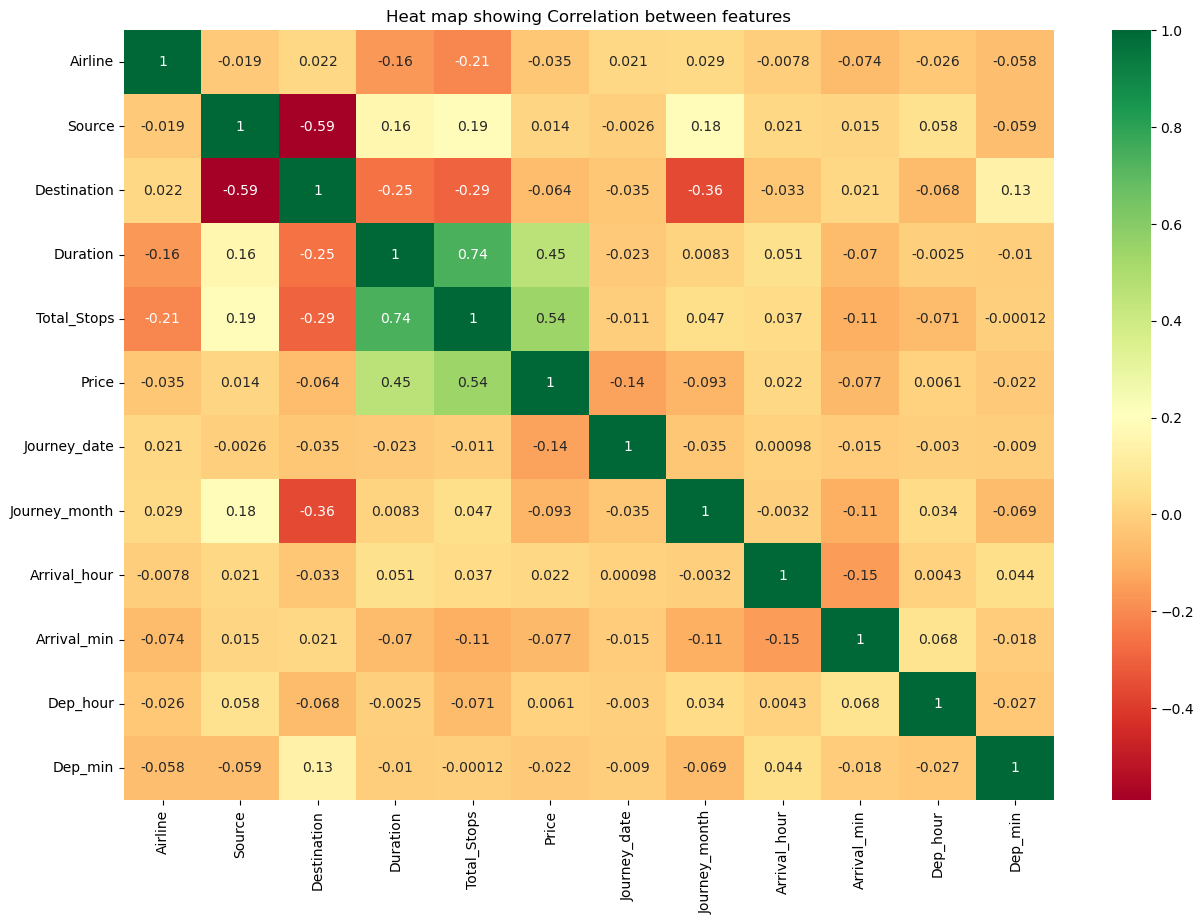

In [53]:
plt.figure(figsize=(15,10))

sns.heatmap(flight_df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

#### There is a high correlation between:
- Price & Total Stops
- Price & flight duration
- Duration & Total stops

### Building Machine Learning models

For predicting the Price, we build 3 models using the following algorithms: 
- K neighnors regressor
- Decision Tree regressor
- Random Forest Regressor


In [54]:
#splitting data into train and test dataframe 
train_df=flight_df[0:10683]
test_df=flight_df[10683:]

In [55]:
train_df.tail()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
10678,0,3,0,150,0,4107.0,9,4,22,25,19,55
10679,1,3,0,155,0,4145.0,27,4,23,20,20,45
10680,4,0,2,180,0,7229.0,27,4,11,20,8,20
10681,10,0,5,160,0,12648.0,1,3,14,10,11,30
10682,1,2,1,500,2,11753.0,9,5,19,15,10,55


In [56]:
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
10683,4,2,1,655,1,9087.064121,6,6,4,25,17,30
10684,3,3,0,240,1,9087.064121,12,5,10,20,6,20
10685,4,2,1,1425,1,9087.064121,21,5,19,0,19,15
10686,6,2,1,780,1,9087.064121,21,5,21,0,8,0
10687,0,0,2,170,0,9087.064121,24,6,2,45,23,55


In [57]:
#splitting data into x and y
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values

In [58]:
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#### Import models

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [60]:
#function to train the models
def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df  
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [61]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are: [[ 8399.4]
 [ 3843.4]
 [10933. ]
 ...
 [14808.8]
 [ 6443.2]
 [ 6902.4]]


r2 score : 0.5878415036033772
MAE: 1769.0793710220892
MSE: 8587336.488041932


In [62]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are: [ 6314.  3857. 10991. ... 14441.  7229.  6276.]


r2 score : 0.6357434370724668
MAE: 1430.6615624610008
MSE: 7589298.052044179


In [63]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are: [ 6925.65        3841.14666667 11613.67       ... 14273.45130952
  6923.01583333  6564.73      ]


r2 score : 0.8028190463594945
MAE: 1187.8028918939124
MSE: 4108271.9700010316


In [64]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,58.784150
1,Decision Tree,63.574344
2,Random Forest,80.281905


Random forest Refrestion id highly accurate sot it will be go for Hyperparamerter Tunning.

### Hyperparameter tuning

#### Applying  Random Search to find the best parameters

In [65]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [66]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [67]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.811510429386304

#### After hypertuning, the accuracy increases.

In [69]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.811510429386304
MAE: 1233.6491746294078
MSE: 3927186.704865925
RMSE: 1981.7130732943972
